# DATASCI 217 Assignment 7: Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in country csv files

In [3]:
countryList = [
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-hkg--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-kor--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tha--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vnm--age--gender--year.csv"
              ]
df = pd.read_csv(countryList[0])
for i in range(1, len(countryList)):
    new_df = pd.read_csv(countryList[i])
    df = pd.concat([df, new_df])
    
print(df.head())
    

  country  age  gender  year  population
0     hkg    0       1  1950       48209
1     hkg    0       1  1951       40952
2     hkg    0       1  1952       42394
3     hkg    0       1  1953       43944
4     hkg    0       1  1954       45838


## Part 1: Matplotlib

### Line Graph

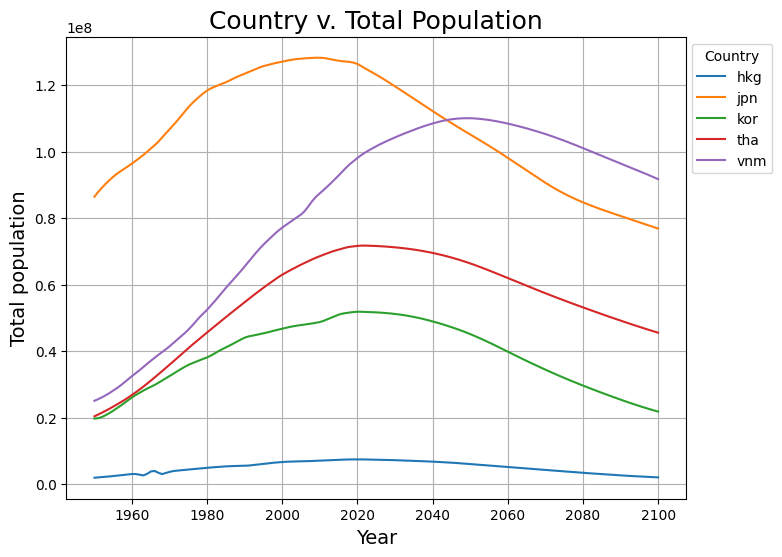

In [8]:
yearly_total = df.groupby(['country','year'])['population'].sum() # sort by country and year

fig = plt.figure(figsize = (8, 6)) # set figure size
ax = plt.subplot(111)
colorList = ["red", "blue", "orange", "purple", "magenta"] # list of colors to use


for i in df['country'].unique():
    ax.plot(yearly_total[i], label=i) # plot for each country
    
plt.xlabel("Year", fontsize=14) # set labels
plt.ylabel("Total population", fontsize=14)
plt.title("Country v. Total Population", fontsize=18) # set title
ax.legend(title='Country', bbox_to_anchor=(1.15, 1)) # set legend outside of plot
plt.grid()
plt.show() # show plot


### Stacked Bar Chart

C:\Users\wammi\AppData\Local\Temp\ipykernel_59792\1796237340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['age_group'] = pd.cut(filtered['age'], bins=age_bins, labels=age_labels)


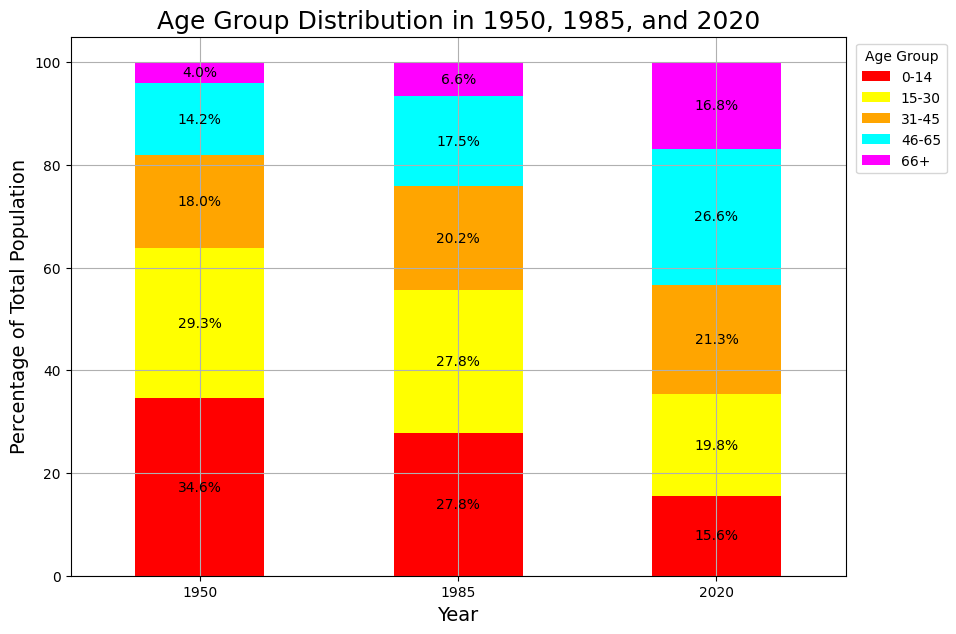

In [7]:
# Filter specific age groups
filtered = df[df['year'].isin([1950, 1985, 2020])]

age_bins = [0, 14, 30, 45, 65, 100]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

filtered['age_group'] = pd.cut(filtered['age'], bins=age_bins, labels=age_labels)

grouped = filtered.groupby(['year', 'age_group'])['population'].sum().unstack()

percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 7))
percent.plot(kind='bar', stacked=True, ax=ax, color=["red", "yellow", "orange", "aqua", "magenta"])

plt.title('Age Group Distribution in 1950, 1985, and 2020', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Total Population', fontsize=14)
plt.xticks(ticks=range(len(percent.index)), labels=percent.index, rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.005, 1), loc='upper left')

for i, year in enumerate(percent.index):
    cumulative = 0
    for j, age_group in enumerate(percent.columns):
        value = percent.loc[year, age_group]
        if value > 0:  #Check to make sure not zero
            ax.text(i, cumulative + value / 2, f"{value:.1f}%", ha="center", va="center", color="black", fontsize=10)
        cumulative += value  # Adjust height

plt.grid()
plt.show()

 ## Part 2: Seaborn
 
 ### Heatmap

C:\Users\wammi\AppData\Local\Temp\ipykernel_37288\1124373240.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels)


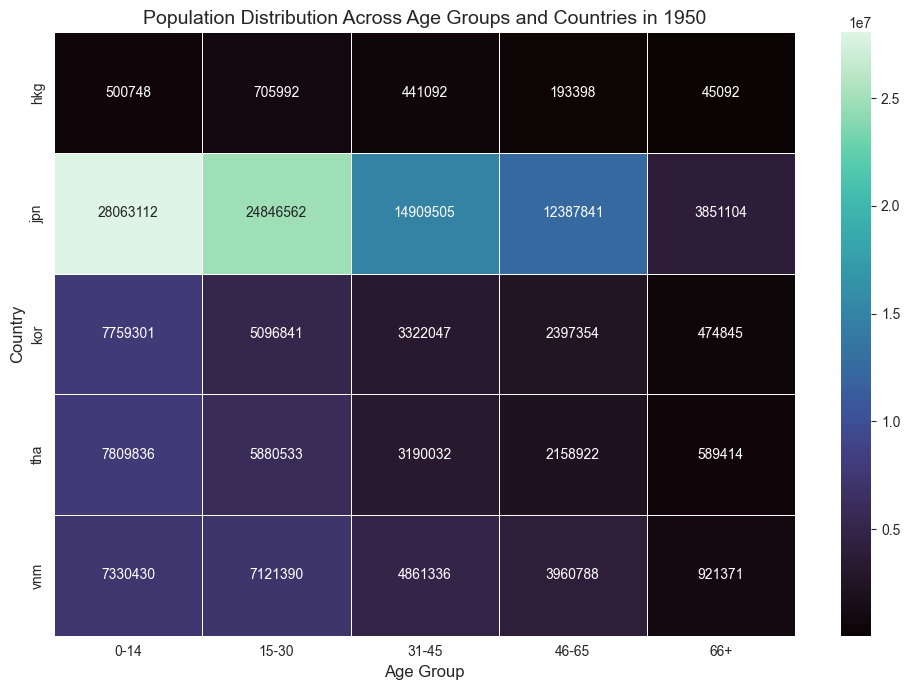

In [106]:
sns.set_style("whitegrid")
year= 1950
countries = ['hkg', 'vnm', 'tha', 'jpn', 'kor']

df_filtered = df[(df['year'] == year) & (df['country'].isin(countries))]

# Create bins for age groups: 0-14, 15-30, 31-45, 46-65, 66+
age_bins = [0, 14, 30, 45, 65, 100]  # Assuming max age is 100
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Assign 'age_group' based on age bins
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels)

# Group by country and age group, and sum the population
df_grouped = df_filtered.groupby(['country', 'age_group'])['population'].sum().unstack()


plt.figure(figsize=(10, 7))

sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_grouped, annot=True, fmt=".0f", cmap="mako", linewidths=0.5)

# Customize the chart
plt.title(f'Population Distribution Across Age Groups and Countries in 1950', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()


# Display the heatmap
plt.show()

This heatmap illustrates the population distribution across age groups in Hong Kong, Japan, Korea, Thailand, and Vietnam in 1950. As illustrated by this heat map, the population in all of these countries is relatively small, where Japan's population is larger in population across almost all age groups. In addition, Hong Kong, Korea, Thailand, and Vietnam have small populations in all age groups, when looking at the heat map key. 

### Violin Plots

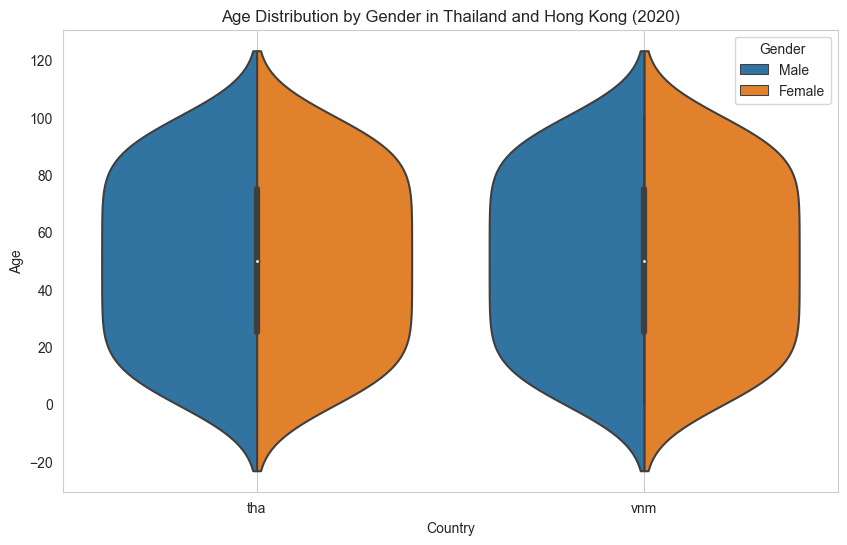

In [105]:
sns.set_style("whitegrid")
countryList = [
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-hkg--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-kor--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tha--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vnm--age--gender--year.csv"
              ]

c1 = pd.read_csv(countryList[3])
c2 = pd.read_csv(countryList[4])

c1 = c1[c1['year'] == 2020]
c2 = c2[c2['year'] == 2020]

df_combined = pd.concat([c1, c2])
df_combined['gender'] = df_combined['gender'].replace({1: 'Male', 2: 'Female'})

plt.figure(figsize=(10, 6))
sns.violinplot(x='country', y='age', hue='gender', data=df_combined, split=True)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Age Distribution by Gender in Thailand and Hong Kong (2020)')
plt.legend(title='Gender', loc='upper right')

# Display the plot
plt.show()


These plots illustrate that the gender ratio between males and females in thailand and vietnam are very similar. This is illsutrated by the violin plots that closely resemble each other.

### Pairplot

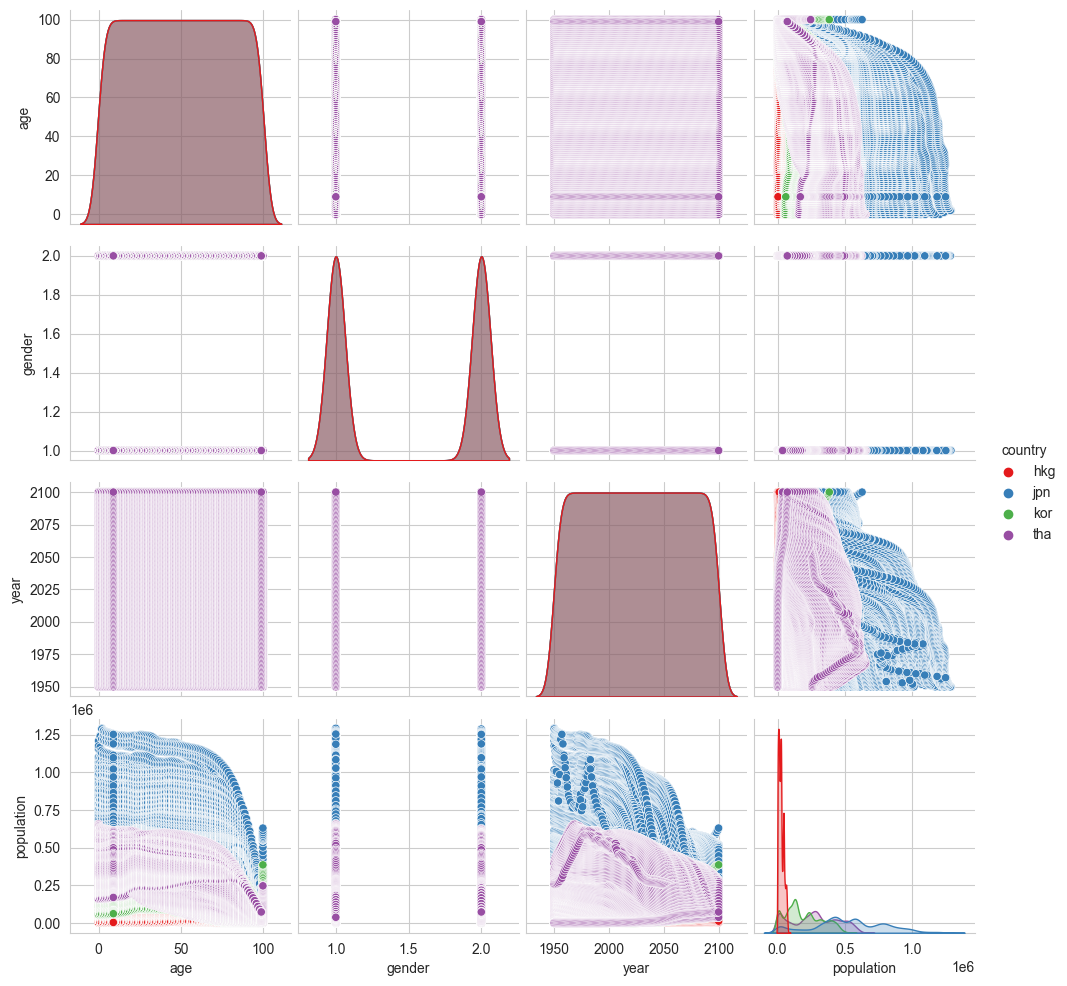

In [111]:
countryList = [
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-hkg--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-kor--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tha--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vnm--age--gender--year.csv"
              ]
df = pd.read_csv(countryList[0])
for i in range(1, len(countryList)-1):
    new_df = pd.read_csv(countryList[i])
    df = pd.concat([df, new_df])

sns.pairplot(df, hue='country', diag_kind='auto', palette='Set1')
plt.show()

This pairplot illustrates how each of the variables compare against each other using scatter plots. In this case, from the comparison of age v population, we can see how the population decreases as age increases. In addition, we are able to see the pattern of how the population chanegs over the course of time in the year v population plot. To be honest, a pairplot is not the best plot to use to illustrate the information that we have, because it does not give a good visual representation of the data that is easily readable and comprehendable.